In [38]:
import numpy as np
from copy import deepcopy
from ctbn.active_sampler import ActiveSampler, SamplingStrategy
from ctbn.ctbn_model import CTBN, CTBNNode
from ctbn.learner import CTBNLearner, CTBNLearnerNode
from ctbn.plots import LearningCurve, LearningPlotter, PlotType
from ctbn.types import State, States, Trajectory, Transition

In [39]:
import graphviz
def plot_network(ctbn):
    targets = []
    sources = []
    for n in ctbn.nodes:
            sources += [p._name for p in n.parents]
            targets += [n._name for p in n.parents]
    f = graphviz.Digraph()
    targets = [target for target in targets]
    sources = [source for source in sources]
    plot_nodes = np.unique(sources+targets)
    for plot_node in plot_nodes:
            f.node(plot_node) 
    edges = []
    for (s,t) in zip(sources,targets):
            
            if (s,t) in edges:
                    None
            else:
                    f.edge(s,t)
            edges.append((s,t))
    return f

#  Define ground truth network

INFO:Initialiting Random Conditional Intensity Matrices:
DEBUG:{(): [[-4.68176536  4.68176536]
 [ 0.18737173 -0.18737173]]}
DEBUG:{(): [[-0.83436299  0.83436299]
 [ 3.24659311 -3.24659311]]}
DEBUG:{(0,): [[-0.60678428  0.60678428]
 [ 5.34679413 -5.34679413]],
 (1,): [[-0.02453197  0.02453197]
 [ 3.57050964 -3.57050964]]}
DEBUG:{(0, 0): [[-2.71736822  2.71736822]
 [ 0.29051183 -0.29051183]],
 (0, 1): [[-4.43054261  4.43054261]
 [ 2.04536227 -2.04536227]],
 (1, 0): [[-1.36494178  1.36494178]
 [ 0.47920812 -0.47920812]],
 (1, 1): [[-0.92911922  0.92911922]
 [ 3.32390575 -3.32390575]]}
DEBUG:run [WindowsPath('dot'), '-Kdot', '-Tsvg']


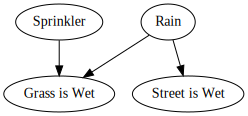

In [40]:
sprinkler = CTBNNode(State(0),States((0,1)),parents=[],name="Sprinkler",alpha=1,beta=0.5)
rain = CTBNNode(State(0),States((0,1)),parents=[],name="Rain",alpha=1,beta=0.5)
street_is_wet =CTBNNode(State(0),States((0,1)),parents=[rain],name="Street is Wet",alpha=1,beta=0.5)
grass_is_wet = CTBNNode(State(0),States((0,1)),parents=[sprinkler,rain],name="Grass is Wet",alpha=1,beta=0.5)
nodes = [sprinkler,rain,street_is_wet,grass_is_wet]
ctbn = CTBN.with_random_cims(nodes)

#  Generate data
data = Trajectory()
[data.append(ctbn.transition()) for k in range(0,5000)]

#  Plot network
plot_network(ctbn)

# Learn network (only graph)

Parents of [Sprinkler] are 
Parents of [Rain] are 
Parents of [Street is Wet] are [Rain], 


DEBUG:run [WindowsPath('dot'), '-Kdot', '-Tsvg']


Parents of [Grass is Wet] are [Rain], [Sprinkler], 


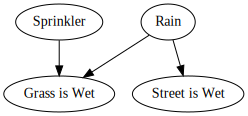

In [42]:
sprinkler = CTBNLearnerNode(State(0),States((0,1)),parents=[],name="Sprinkler",alpha=1,beta=1)
rain = CTBNLearnerNode(State(0),States((0,1)),parents=[],name="Rain",alpha=1,beta=1)
street_is_wet =CTBNLearnerNode(State(0),States((0,1)),parents=[],name="Street is Wet",alpha=1,beta=1)
grass_is_wet = CTBNLearnerNode(State(0),States((0,1)),parents=[],name="Grass is Wet",alpha=1,beta=1)
nodes = [sprinkler,rain,street_is_wet,grass_is_wet]

ctbn_learner = CTBNLearner(nodes)

for node in ctbn_learner.nodes:
    ctbn_learner.learn_k_hop_network_of_node_greedy(node,data._transitions,4,0)


plot_network(ctbn_learner)

# Learn parameters and check for predictive performance by comparing generated samples with actual ones

In [10]:
# Learn parameters (Conditional Intensity Matrices (CIMs))
ctbn_learner.reset_stats()
for trans in data._transitions:
            ctbn_learner.update_stats(trans)
ctbn_learner.estimate_cims()
ctbn_learner.print_cims()
ctbn.print_cims()

INFO:Conditional Intensity Matrices:
DEBUG:{(): [[-0.55095553  0.55095553]
 [ 3.27768681 -3.27768681]]}
DEBUG:{(): [[-0.30620257  0.30620257]
 [ 0.47683478 -0.47683478]]}
DEBUG:{(0,): [[-0.96460926  0.96460926]
 [ 2.62136101 -2.62136101]],
 (1,): [[-6.80190771  6.80190771]
 [ 4.85505833 -4.85505833]]}
DEBUG:{(0, 0): [[-1.03414206  1.03414206]
 [ 0.58863315 -0.58863315]],
 (0, 1): [[-1.52173373  1.52173373]
 [ 6.17453539 -6.17453539]],
 (1, 0): [[-4.04009989  4.04009989]
 [ 2.99252531 -2.99252531]],
 (1, 1): [[-3.7884552   3.7884552 ]
 [ 1.13489351 -1.13489351]]}
INFO:Conditional Intensity Matrices:
DEBUG:{(): [[-0.54581329  0.54581329]
 [ 3.35688677 -3.35688677]]}
DEBUG:{(): [[-0.29629695  0.29629695]
 [ 0.5181194  -0.5181194 ]]}
DEBUG:{(0,): [[-0.9372562  0.9372562]
 [ 2.6647185 -2.6647185]],
 (1,): [[-6.71507551  6.71507551]
 [ 4.69895539 -4.69895539]]}
DEBUG:{(0, 0): [[-1.10181423  1.10181423]
 [ 0.49258937 -0.49258937]],
 (0, 1): [[-3.96722211  3.96722211]
 [ 3.2824564  -3.2824564 

In [11]:
# For reference train a model without parents
sprinkler = CTBNLearnerNode(State(0),States((0,1)),parents=[],name="Sprinkler",alpha=1,beta=2)
rain = CTBNLearnerNode(State(0),States((0,1)),parents=[],name="Rain",alpha=1,beta=0.2)
street_is_wet =CTBNLearnerNode(State(0),States((0,1)),parents=[],name="Street is Wet",alpha=1,beta=1)
grass_is_wet = CTBNLearnerNode(State(0),States((0,1)),parents=[],name="Grass is Wet",alpha=2,beta=0.2)
nodes_ = [sprinkler,rain,street_is_wet,grass_is_wet]
ctbn_learner_no_parents = CTBNLearner(nodes_)

# For reference train a model with random matrices
ctbn_learner_rnd = CTBNLearner(deepcopy(nodes_))

# Expected Relative Deviation of waiting times as metrics

In [35]:
number_of_correctly_predicted = []
number_of_correctly_predicted_rnd  = []
dtransition_times = []
dtransition_times_rnd =[]
dtransition_times_no_parents =[]

m = 0
# Estimate out-of-sample-error 
for trans in data._transitions[0:int(len(data._transitions)/2)]:
        if m %100 == 0:
            print("%2.f of 100 percent finished for network" % (100*m/int(len(data._transitions)/2)))
        m+=1

        # %% Learn simulable model 
        ctbn_learner_ = deepcopy(ctbn_learner)
        ctbn_learner_.reset_stats()
        ctbn_learner_no_parents.reset_stats()
        for trans_ in data._transitions[int(len(data._transitions)/2):-1]:
                ctbn_learner_.update_stats(trans_)
                ctbn_learner_no_parents.update_stats(trans_)
        ctbn_learner_.estimate_cims()
        ctbn_learner_no_parents.estimate_cims()
        ctbn_learner_rnd.sample_cims()
      
        for i in range(0,len(ctbn_learner_.nodes)):
                ctbn_learner_.nodes[i]._state = trans._s_init[i]                              
        trans_predicted = ctbn_learner_.transition()       
        dtransition_times.append(abs(( trans_predicted ._exit_time-trans._exit_time)))

        for i in range(0,len(ctbn_learner_rnd.nodes)):
                ctbn_learner_rnd.nodes[i]._state = trans._s_init[i]                              
        trans_predicted = ctbn_learner_rnd.transition()       
        dtransition_times_rnd.append(abs(( trans_predicted ._exit_time-trans._exit_time)))

        for i in range(0,len(ctbn_learner_no_parents.nodes)):
                ctbn_learner_no_parents.nodes[i]._state = trans._s_init[i]                        
        trans_random = ctbn_learner_no_parents.transition()                              
        dtransition_times_no_parents.append(abs((trans_random ._exit_time-trans._exit_time)))

 0 of 100 percent finished for network
 4 of 100 percent finished for network
 8 of 100 percent finished for network
12 of 100 percent finished for network
16 of 100 percent finished for network
20 of 100 percent finished for network
24 of 100 percent finished for network
28 of 100 percent finished for network
32 of 100 percent finished for network
36 of 100 percent finished for network
40 of 100 percent finished for network
44 of 100 percent finished for network
48 of 100 percent finished for network
52 of 100 percent finished for network
56 of 100 percent finished for network
60 of 100 percent finished for network
64 of 100 percent finished for network
68 of 100 percent finished for network
72 of 100 percent finished for network
76 of 100 percent finished for network
80 of 100 percent finished for network
84 of 100 percent finished for network
88 of 100 percent finished for network
92 of 100 percent finished for network
96 of 100 percent finished for network


In [34]:
q = np.percentile(dtransition_times,5)
x = np.percentile(dtransition_times,50)
p = np.percentile(dtransition_times,95)
print("Expected relative deviation of transition time %f, (%f,%f)" %(x,q,p))

q = np.percentile(dtransition_times_no_parents,5)
x = np.percentile(dtransition_times_no_parents,50)
p = np.percentile(dtransition_times_no_parents,95)
print("Expected relative deviation of transition time (no parents) %f, (%f,%f)" %(x,q,p))

q = np.percentile(dtransition_times_rnd,5)
x = np.percentile(dtransition_times_rnd,50)
p = np.percentile(dtransition_times_rnd,95)
print("Expected relative deviation of transition time (rnd) %f, (%f,%f)" %(x,q,p))

Expected relative deviation of transition time 0.088666, (0.005659,0.586646)
Expected relative deviation of transition time (no parents) 0.103581, (0.007258,0.569921)
Expected relative deviation of transition time (rnd) 0.081560, (0.005937,0.547304)
